In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import tqdm
import datetime
import pytz

In [2]:
csv_path = "/Users/phinchosherpa/Desktop/nyu/BirdVox-full-night_csv-annotations_unit03.csv"
df=pd.read_csv(csv_path)
df.head()

,Time (s),Freq (Hz)
0,1021.186,6632
1,1091.860,3000
2,1207.475,6632
3,1284.754,6790
4,1299.367,6947


In [3]:
from datetime import datetime, timezone
from datetime import timedelta

est_tz = pytz.timezone("US/Eastern")
utc_dt = datetime(year=2015, month=9, day=23, hour=23, minute=31, second=2, tzinfo=pytz.timezone("UTC"))
local_dt = utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=est_tz)

astro_twilight24 = datetime(
    year=2015, month=9, day=24, hour=5, minute=13, second=0, tzinfo=est_tz) # TODO REPLACE BY ACTUAL NUMBER
astro_twilight23 = datetime(
    year=2015, month=9, day=24, hour=8+12, minute=23, second=0, tzinfo=est_tz)
nautical_twilight23=datetime(
    year=2015, month=9, day=24, hour=7+12, minute=51, second=0, tzinfo=est_tz)
civil_twilight23=datetime(
    year=2015, month=9, day=24, hour=7+12, minute=19, second=0, tzinfo=est_tz)
#out of the time zone
#nau_twilight=datetime(
    #year=2015, month=9, day=24, hour=5, minute=45, second=0, tzinfo=est_tz)
#out of the time zone
#civil_twilight=datetime(
 #   year=2015, month=9, day=24, hour=6, minute=17, second=0, tzinfo=est_tz)
astronomical_time24=(astro_twilight24 - local_dt).seconds
astronomical_time23=(astro_twilight23 - local_dt).seconds
nautical_time23=(nautical_twilight23 - local_dt).seconds
civil_time23=(civil_twilight23 - local_dt).seconds

#nautical_time=(nau_twilight - local_dt).seconds
#civil_time=(civil_twilight - local_dt).seconds


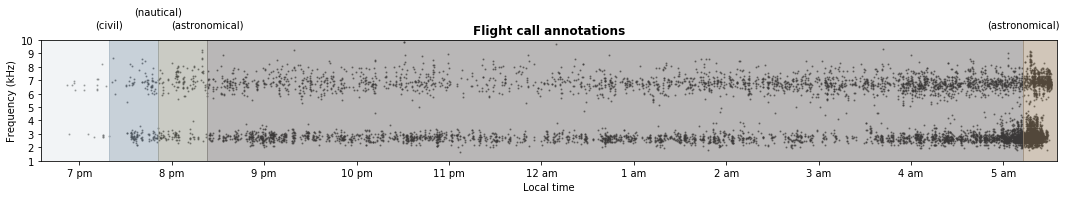

In [4]:
plt.figure(figsize=(15, 3))
plt.scatter(
    df["Time (s)"], df["Freq (Hz)"], s=5, marker='.', alpha=0.5, color='k')

first_tick_dt = datetime(2015, 9, 23, 19, 0, 0, tzinfo=est_tz)
first_tick_delta = (first_tick_dt - local_dt).seconds

plt.xticks(np.arange(first_tick_delta, first_tick_delta+11*3600, 3600))
#time=[6pm,7pm, 8pm, 9pm,10pm,11pm,12am,1am,2am,3am,4am,5am]
#plt.gca().set_xticklabels(np.arange(6,17))
plt.gca().set_xticklabels(
    [str(x) + " pm" for x in range(7, 12)] +\
    ["12 am"] +\
    [str(x) + " am" for x in range(1, 7)])
plt.xlabel("Local time")
plt.gca().set_yticks(np.arange(1000, 11000, 1000))
plt.gca().set_yticklabels(np.arange(1,11), ha = 'right')
plt.ylabel("Frequency (kHz)")
plt.xlim(0, 11*3600)
plt.title("Flight call annotations",weight="bold")

#plt.axvline(x=astronomical_time24, color='k', linewidth=1.0, linestyle='--', label="24Astronomical") 
#plt.axvline(x=nautical_time23, color='k', linewidth=1.0, linestyle='--', label="23Nautical")
#plt.axvline(x=astronomical_time23, color='k', linewidth=1.0, linestyle='--', label="23Astronomical") 
#plt.axvline(x=civil_time23, color='k', linewidth=1.0, linestyle='--', label="23Civil") 

plt.fill_between([0, civil_time23], 20000, 0, color="#E6EBEE", alpha=0.5)
plt.fill_between([civil_time23,nautical_time23 ], 20000, 0, color="#92A4B5", alpha=0.5)
plt.fill_between([nautical_time23, astronomical_time23], 20000, 0, color="#97998B", alpha=0.5)
plt.fill_between([astronomical_time23,astronomical_time24 ], 20000, 0, color="#757170", alpha=0.5)
plt.fill_between([astronomical_time24,11*3600 ], 20000, 0, color="#A48F74", alpha=0.5)
#plt.fill_between([astronomical_time23, nautical_time23], 20000, 0, color="#FCA699", alpha=0.5)

plt.text(civil_time23,10900,s="(civil)", fontdict=None, horizontalalignment='center')
plt.text(nautical_time23,11900,s="(nautical)", fontdict=None, horizontalalignment='center')
plt.text(astronomical_time23,10900,s="(astronomical)", fontdict=None, horizontalalignment='center')
plt.text(astronomical_time24,10900,s="(astronomical)", fontdict=None, horizontalalignment='center')
plt.ylim(1000, 10000)

plt.tight_layout()
plt.savefig("flight_call_annotations.png", bbox_inches="tight", dpi=2000)

In [5]:
# Eastern Standard Time with Daylight Saving

#09/24
#Sunrise:6:45 am Sunset:6:50 pm 
#Astronomical: 5:13 am, 8:21 pm   Nautical= 5:45 am	7:49 pm        Civil=6:17 am	7:17 pm
#09/23
#astronomical =8:23, nautical=7:51 pm, civil=7:19 pm

In [5]:
csv_path2 = "/Users/phinchosherpa/Desktop/nyu/unit03_024508464_06632_1.Table.1.selections.txt"
df2=pd.read_csv(csv_path2,sep='\t')
df2.head()

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Begin Path,Species,Family,Order
0,1,Spectrogram 1,1,0.0,0.5,0.0,12000.0,/Volumes/Public/HD5/BirdVox-70k_unit03/unit03_...,cswa,warbler,passerine
1,2,Spectrogram 1,1,0.5,1.0,0.0,12000.0,/Volumes/Public/HD5/BirdVox-70k_unit03/unit03_...,swth,thrush,passerine
2,3,Spectrogram 1,1,1.0,1.5,0.0,12000.0,/Volumes/Public/HD5/BirdVox-70k_unit03/unit03_...,NaN,NaN,passerine
3,4,Spectrogram 1,1,1.5,2.0,0.0,12000.0,/Volumes/Public/HD5/BirdVox-70k_unit03/unit03_...,NaN,warbler,passerine
4,5,Spectrogram 1,1,2.0,2.5,0.0,12000.0,/Volumes/Public/HD5/BirdVox-70k_unit03/unit03_...,NaN,NaN,passerine


In [13]:
def parse_time(row, sr=24000):
    return int((row[1]["Begin Path"].split("/")[5]).split("_")[1])/24000

def parse_frequency(row):
    return int((row[1]["Begin Path"].split("/")[5]).split("_")[2])

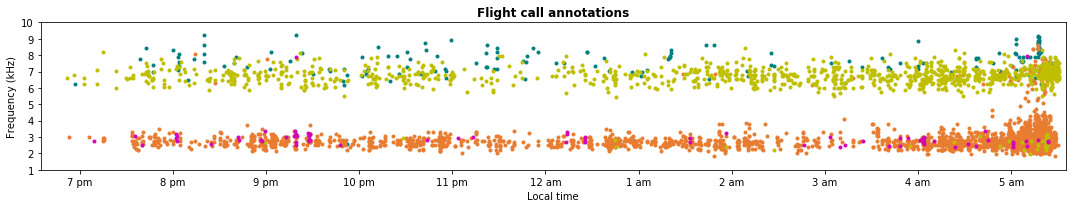

In [38]:
plt.figure(figsize=(15, 3))
family = "sparrow"
family_df2 = df2[df2["Family"]==family]

family_times = list(map(parse_time, family_df2.iterrows()))
family_freqs = list(map(parse_frequency, family_df2.iterrows()))
plt.scatter(family_times, family_freqs, c="teal", alpha=1, marker='.',label="Sparrow")

#e87d31

family = "thrush"
family_df2 = df2[df2["Family"]==family]

family_times = list(map(parse_time, family_df2.iterrows()))
family_freqs = list(map(parse_frequency, family_df2.iterrows()))

plt.scatter(family_times, family_freqs, c="#e87d31", alpha=1, marker='.',label="Thrush")

family = "warbler"
family_df2 = df2[df2["Family"]==family]

family_times = list(map(parse_time, family_df2.iterrows()))
family_freqs = list(map(parse_frequency, family_df2.iterrows()))

plt.scatter(family_times, family_freqs, c="y", alpha=1, marker='.',label="Warbler") #purple

family = "cardinal"
family_df2 = df2[df2["Family"]==family]

family_times = list(map(parse_time, family_df2.iterrows()))
family_freqs = list(map(parse_frequency, family_df2.iterrows()))

plt.scatter(family_times, family_freqs, c="#d404b8", alpha=1, marker='.', label="Cardinal") #pink

family = "unknown"
family_df2 = df2[df2["Family"].isnull()]

family_times = list(map(parse_time, family_df2.iterrows()))
family_freqs = list(map(parse_frequency, family_df2.iterrows()))

#plt.scatter(family_times, family_freqs, c="gray", alpha=0.1, marker='.',label="NaN")

plt.xticks(np.arange(first_tick_delta, first_tick_delta+11*3600, 3600))

plt.gca().set_xticklabels(
    [str(x) + " pm" for x in range(7, 12)] +\
    ["12 am"] +\
    [str(x) + " am" for x in range(1, 7)])
plt.xlabel("Local time")
plt.gca().set_yticks(np.arange(1000, 11000, 1000))
plt.gca().set_yticklabels(np.arange(1,11), ha = 'right')
plt.ylabel("Frequency (kHz)")
plt.xlim(0, 11*3600)
plt.title("Flight call annotations",weight="bold")

#plt.axvline(x=astronomical_time24, color='k', linewidth=1.0, linestyle='--') 
#plt.axvline(x=nautical_time23, color='k', linewidth=1.0, linestyle='--')
#plt.axvline(x=astronomical_time23, color='k', linewidth=1.0, linestyle='--') 
#plt.axvline(x=civil_time23, color='k', linewidth=1.0, linestyle='--') 

#plt.fill_between([0, civil_time23], 20000, 0, color="#E3A857", alpha=0.5)
#plt.fill_between([civil_time23,nautical_time23 ], 20000, 0, color="#c18e01", alpha=0.5)
#plt.fill_between([nautical_time23, astronomical_time23], 20000, 0, color="#97998B", alpha=0.5)
#plt.fill_between([astronomical_time23,astronomical_time24 ], 20000, 0, color="#001A26", alpha=0.5)
#plt.fill_between([astronomical_time24,11*3600 ], 20000, 0, color="#D29739", alpha=0.5)
#plt.fill_between([astronomical_time23, nautical_time23], 20000, 0, color="#FCA699", alpha=0.5)

#plt.text(civil_time23,10900,s="(civil)", fontdict=None, horizontalalignment='center')
#plt.text(nautical_time23,11900,s="(nautical)", fontdict=None, horizontalalignment='center')
#plt.text(astronomical_time23,10900,s="(astronomical)", fontdict=None, horizontalalignment='center')
#plt.text(astronomical_time24,10900,s="(astronomical)", fontdict=None, horizontalalignment='center')
plt.ylim(1000, 10000)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig("flight_call_annotations.png", bbox_inches="tight", dpi=2000)